In [4]:
import csv
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Dropout
from keras.layers.convolutional import Convolution2D
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

%matplotlib inline

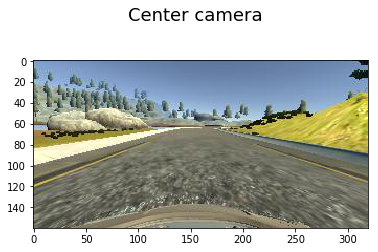

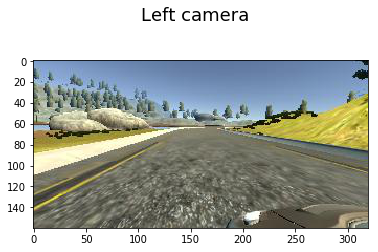

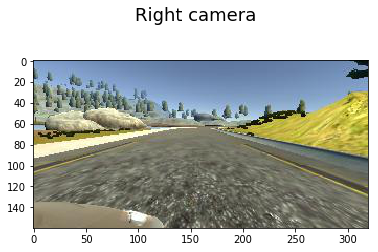

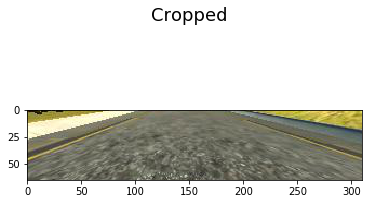

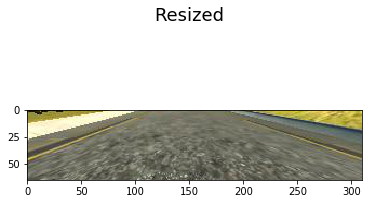

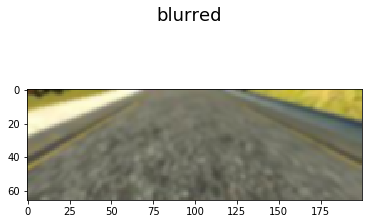

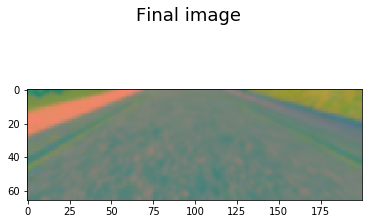

In [12]:
def plot(img, title):
    fig = plt.figure()
    fig.suptitle(title, fontsize=18)
    plt.imshow(img)
    plt.show()
    
    
def rgb(img):
      return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


samples = []
data_folder = '/Users/daard/Documents/CarND/p3/data/'
with open(data_folder + '/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)
        
line = shuffle(samples)[0]

center = rgb(cv2.imread(data_folder + line[0].strip()))
left = rgb(cv2.imread(data_folder + line[1].strip()))
right = rgb(cv2.imread(data_folder + line[2].strip()))

plot(center, "Center camera")
plot(left, "Left camera")
plot(right, "Right camera")

cropped = center[70:135,10:350]
plot(cropped, "Cropped")

resized = cv2.resize(cropped, (200, 66), interpolation=cv2.INTER_AREA)
plot(cropped, "Resized")

blurred = cv2.GaussianBlur(resized, (5,5), 0)
plot(blurred, "blurred")

final_image = cv2.cvtColor(blurred, cv2.COLOR_RGB2YUV)
plot(final_image, "Final image")

## Training loss

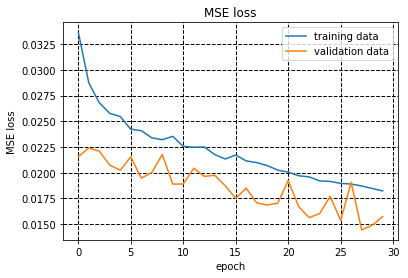

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
loss = [0.033662038928856372, 0.028743688350945582, 0.026802917955154652, 0.025769701745655498, 0.025457422206712644, 0.02422665569214956, 0.024086554597903279, 0.023394927884351786, 0.023210107973604635, 0.023533854937249264, 0.022559882954166367, 0.022480258257977326, 0.022500718627924791, 0.021757555841546514, 0.021332714175799655, 0.021721857906491324, 0.02114514207934547, 0.020980281657965272, 0.020695435339915285, 0.020252044998832607, 0.020055137164357587, 0.019701696271638952, 0.019588898647143072, 0.019198761723805788, 0.01915090185820166, 0.018960833912292252, 0.018893891001988364, 0.018706752728571155, 0.018466459216889605, 0.018225391446389651]
valid_loss = [0.021544674745024139, 0.022406013710285302, 0.022091634627153623, 0.020734456372424145, 0.020242765508777467, 0.021538911294655419, 0.019477105940418755, 0.020014051069964223, 0.021767700558982382, 0.0188957349957889, 0.018895826756546451, 0.02043509086714455, 0.019642220884190861, 0.019751964767106729, 0.018732922522360411, 0.017501503173539889, 0.018486956120538179, 0.017063165166929586, 0.016850258951163412, 0.017035871818291012, 0.019236071419841912, 0.016694398124271363, 0.015627204194961497, 0.016025352222261143, 0.017692891565795562, 0.015354680254202873, 0.019066986984652073, 0.014433143400953185, 0.014897310096233045, 0.015714093171690233]
plt.plot(loss)
plt.plot(valid_loss)
plt.title('MSE loss')
plt.ylabel('MSE loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.grid(color='black', linestyle='--', linewidth=1)
plt.show()

## Model architecture

In [2]:
from keras.models import load_model

load_model('model.h5').summary()

Using TensorFlow backend.


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 66, 200, 3)    0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 31, 98, 24)    1824        lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 14, 47, 36)    21636       convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_3 (Convolution2D)  (None, 5, 22, 48)     43248       convolution2d_2[0][0]            
___________________________________________________________________________________________